# This is an EDA for the taxi dataset

In [136]:
# We read the comme separated value (CSV) file and return it as a dataframe
# To explore the the comme separated values (CSV), I always check what columns we have to work with

import pandas as pd

df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")

# checking the column names can also be done with 'df.columns'
df.head(15)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.39,1.52,0.47,NaN,75.5657


In [137]:
# We check the shape (rows and columns) of the dataset, to later compare it to the df.info() below

df.shape

# We have 1000 rows and 11 columns

(1000, 11)

In [138]:
# We also want to check df.info(), to see what datatypes the columns are
# Here, we can see that 'Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather' are of type 'object', which we need to deal with
# We also see that all columns have a non-null count of 950, except for the trip price, which has 951. We need to explore this further

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [139]:
# It's also useful to get a glimpse of the statistics
# Describe only describes the columns with numerical values

# df.describe()

df.describe(include='all') #, however, also shows the columns with categorical values

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950,950,950.000000,950,950,950.000000,950.000000,950.000000,950.000000,951.000000
unique,NaN,4,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Afternoon,Weekday,NaN,Low,Clear,NaN,NaN,NaN,NaN,NaN
freq,NaN,371,655,NaN,397,667,NaN,NaN,NaN,NaN,NaN
mean,27.070547,NaN,NaN,2.476842,NaN,NaN,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,NaN,NaN,1.102249,NaN,NaN,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,NaN,NaN,1.000000,NaN,NaN,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,NaN,NaN,1.250000,NaN,NaN,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,NaN,NaN,2.000000,NaN,NaN,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,NaN,NaN,3.000000,NaN,NaN,4.260000,1.610000,0.390000,89.055000,69.099350


In [140]:
# These need to be executed one at a time to check the number of times a value appears in a column

df['Day_of_Week'].value_counts()
df['Weather'].value_counts()
df['Traffic_Conditions'].value_counts()
df['Time_of_Day'].value_counts()

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

<Axes: xlabel='Trip_Price', ylabel='Count'>

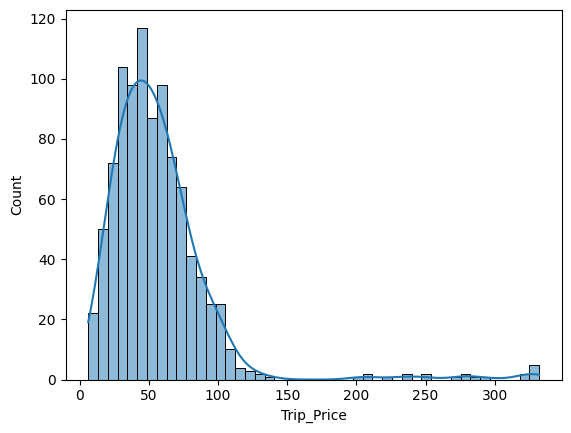

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# We check the disbrution of the prices, noting that a lot of the prices are in and around the 50's
sns.histplot(df["Trip_Price"], kde=True)

<Axes: xlabel='Trip_Price'>

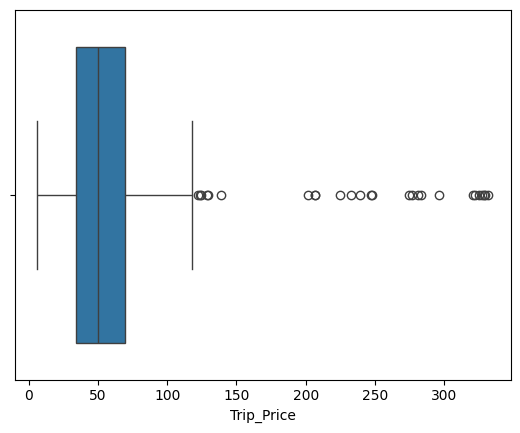

In [142]:
# The histplot above is also confirmed by the boxplot. We have a couple of outliers, which we maybe have to deal with to get a good prediction

sns.boxplot(x='Trip_Price', data=df)

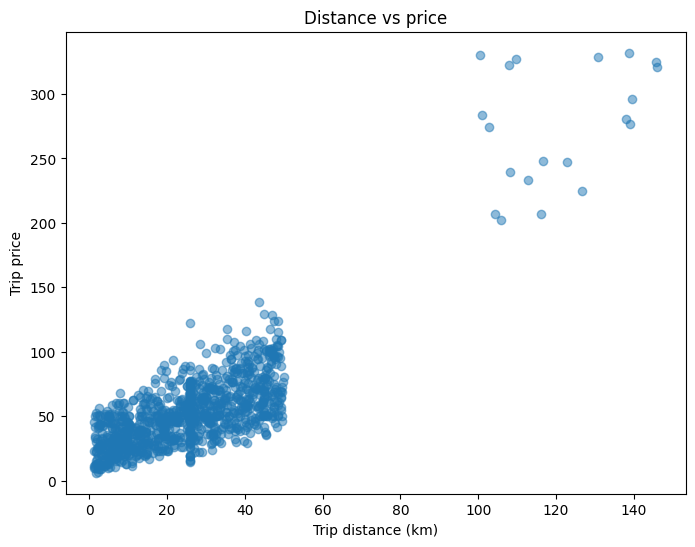

In [ ]:
"""
After exploring the data (both above and below) I realized 83% of the feature importance 
(in the gradient boosting algorithm) was the trip distance. BUT, I also saw that we had a couple of outliers
above in the boxplot. With the scatterplot below I realized that I can keep the outliers, since they have about the same $cost/km
as the shorter/cheaper rides.
""" 


plt.figure(figsize=(8, 6))
plt.scatter(df["Trip_Distance_km"], df["Trip_Price"], alpha=0.5)
plt.xlabel("Trip distance (km)")
plt.ylabel("Trip price")
plt.title("Distance vs price")
plt.show()


In [144]:
# This bit will be done in 'data_processing.py' later, but I am trying it out in the EDA first
# We see that all except one column has 50 missing values
df.isnull().sum()

# For the numerical columns, we can fill the NaN values with the median of that column
numerical_columns = ['Trip_Distance_km', 'Passenger_Count',	'Base_Fare', 'Per_Km_Rate',	'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# 'mode()' returns a pandas series with the most frequent value in the series. 'iloc[0]' refers to THE most frequent
categorical_columns = ['Traffic_Conditions', 'Weather', 'Time_of_Day', 'Day_of_Week']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

df.info()

# Now we can see that none of the columns have null values. Next step will be to do one hot encoding on the categorical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   object 
 5   Weather                1000 non-null   object 
 6   Base_Fare              1000 non-null   float64
 7   Per_Km_Rate            1000 non-null   float64
 8   Per_Minute_Rate        1000 non-null   float64
 9   Trip_Duration_Minutes  1000 non-null   float64
 10  Trip_Price             1000 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [145]:
# I'll do one hot encoding on the categorical values, which is good for the ML-model

df_encoded = pd.get_dummies(df, columns=categorical_columns)


X, y = df_encoded.drop('Trip_Price', axis=1), df_encoded['Trip_Price']


#### Train test split

In [146]:
# Below, I'm doing the train_test_split to split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Trying the linear regression model

In [147]:
# Let's start by doing a linear regression prediction on the dataset
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# We train the data with the LinearRegression object ('model')
model.fit(X_train, y_train)

# Let's make a prediction!
y_pred = model.predict(X_test)

In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# mae = 9.8
# mse = 192.1
# r2 = 0.77

# After evaluating our linear regression model, we can see that we have the above evaluation metrics. We can compare them to other models and see what does the job best.


#### Trying random forest regression

In [149]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_estimators=100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [150]:
# evaluating the RF regression model on our dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# mae = 5.4
# mse = 58.3
# r2 = 0.93

#### Trying Gradient Boosting Regression aswell to compare the results

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mae, mse, r2 = mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

# mae = 4.8
# mse = 53.4
# r2 = 0.94

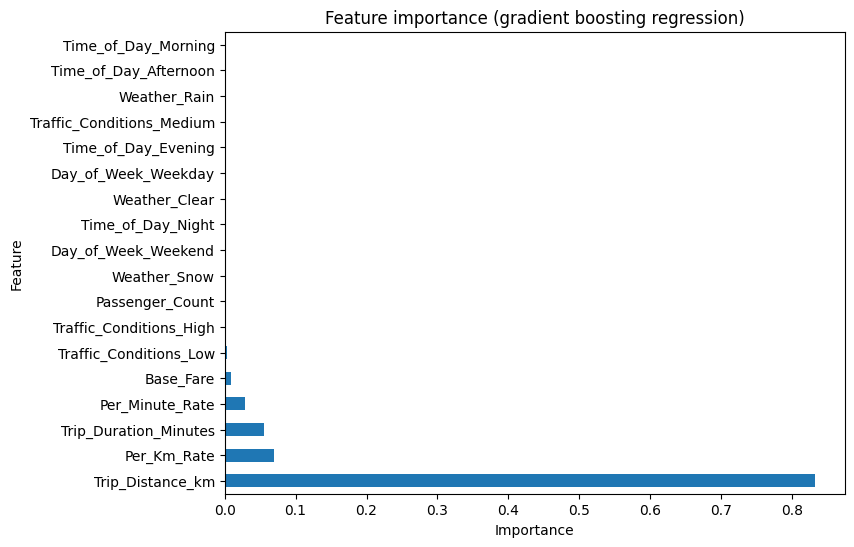

In [152]:
# We can clearly see that the trip distance is the most contributing factor to the result of the gradient boosting regression

feature_importance_in_gbr = pd.Series(gbr.feature_importances_, index=X_train.columns)

feature_importance_sorted = feature_importance_in_gbr.sort_values(ascending=False)

plt.figure(figsize=(8, 6))

feature_importance_sorted.plot(kind='barh')
plt.title('Feature importance (gradient boosting regression)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [153]:
# I'm going to visualize the evaluation metrics for myself here in a df

metrics = {
    'gradient_boosting': [4.8, 53.4, 0.94],
    'random_forest': [5.4, 58.3, 0.93],
    'lin_reg': [9.8, 192.1, 0.77]
}

index = ['mae', 'mse', 'r2']

evaluation_df = pd.DataFrame(metrics, index=index)

evaluation_df

# comparing the evaluation metrics between the models shows that the RF regression is more accurate than linear regression in this instance, but that gradient boosting regression is more accurate than both

,gradient_boosting,random_forest,lin_reg
mae,4.80,5.40,9.80
mse,53.40,58.30,192.10
r2,0.94,0.93,0.77


### Here, I create a to-do-list in the project based on the EDA above

- Transform the categorical values into numerical values (if applicable)